In [1]:
import torch
import torch.nn as nn
import torchaudio as ta
import matplotlib.pyplot as plt

In [2]:
PATH = "K:\OneDrive - Cumberland Valley School District\Education\Activates\Science Fair\PCG-Science-Fair\ECG2PCG\data\preprocessed\physionet-a.pt"
data = torch.load(PATH)
ECG = data["ECG"]
PCG = data["PCG"]

In [3]:
import sys
import torch
import wfdb
from tqdm import tqdm
import os
import numpy as np
import matplotlib.pyplot as plt
sys.path.append("K:/OneDrive - Cumberland Valley School District/Education/Activates/Science Fair/PCG-Science-Fair/ECG2PCG/ECG2PCG")
exec("from modules.data import Preprocessor")


def getData(BASE_PATH="K:\\OneDrive - Cumberland Valley School District\\Education\\Activates\\Science Fair\\PCG-Science-Fair\\ECG2PCG\\data\\training-a"):
        data = {"PCG": [], "ECG": []}
        RECORDS = np.genfromtxt(f"{BASE_PATH}/RECORDS",
                                     delimiter="/n", dtype=str)
        PP = Preprocessor()

        for record_name in RECORDS:
            record = wfdb.rdrecord(f'{BASE_PATH}/{record_name}')
            signal = np.transpose(record.p_signal)
            if signal.shape[0] != 2:
                continue
            data["PCG"].append(torch.tensor(signal[0]))
            data["ECG"].append(torch.tensor(signal[1]))
        return data
udata = getData()

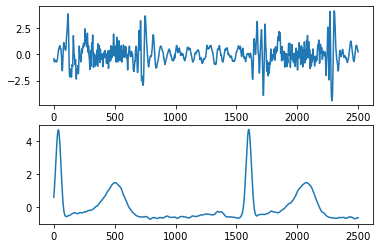

In [4]:
fig, axs = plt.subplots(2)
axs[0].plot(PCG[40][0])
axs[1].plot(ECG[40][0])
plt.show()

In [17]:
import numpy as np
import scipy as sc
from scipy import signal
def spectrogram(data, nperseg=100, noverlap=52, log_spectrogram = True):
    data = np.expand_dims(data, axis = 0)
    fs = 2000
    f, t, Sxx = signal.spectrogram(data, fs=fs, nperseg=nperseg, noverlap=noverlap)
    Sxx = np.transpose(Sxx,[0,2,1])
    if log_spectrogram:
        Sxx = abs(Sxx)
        mask = Sxx > 0
        Sxx[mask] = np.log(Sxx[mask])
    return f, t, Sxx


def test(ECG, PCG, nperseg=100, noverlap=52):

    f1, t1, Sx_log = spectrogram(ECG, nperseg, noverlap)
    f, t, Sx  = spectrogram(PCG, nperseg, noverlap)

    print(np.array(Sx_log).shape, np.array(Sx).shape)
    # Plot the spectrograms as images
    rdata = [PCG, ECG]
    im_list = [Sx[0], Sx_log[0]]
    im_title = ['PCG', 'ECG']
    fig, ax_list = plt.subplots(2, 2, figsize = (15, 6))

    for i, ax in enumerate(ax_list[0]):
        
        ax.imshow(np.transpose(im_list[i]) , cmap = plt.cm.afmhot)
        ax.grid(False)
        ax.invert_yaxis()
        ax.set_title(im_title[i], fontsize = 12)
        ax.set(ylim = [0, im_list[i].shape[1]], yticks = np.arange(0, im_list[i].shape[1] + 1, 5))
        ax.set(xlabel = 'Time [s]', ylabel = 'Frequency [Hz]')
        
        # Replace axis labels with time from t array
        xticks_array = np.arange(0, im_list[i].shape[0] + 1, 100)
        ax.set(xlim = [0, im_list[i].shape[0]], xticks = xticks_array)
        labels_new = [str(np.around(t[label], decimals = 1)) for label in xticks_array]
        ax.set_xticklabels(labels_new)
        ax.tick_params(axis = 'x',
                    which = 'both',
                    bottom = 'off')
        
        ax.tick_params(axis = 'y',
                    which = 'both',
                    left = 'off')
    for i, ax in enumerate(ax_list[1]):
        ax.plot(rdata[i])

    plt.tight_layout()
    plt.show()
    return Sx, Sx_log

36 36 70 1
36 36 70 2
36 36 71 2
36 36 71 3
40 40 78 16
40 40 78 17
40 40 79 17
40 40 79 18
44 44 86 30
44 44 86 31
44 44 87 31
44 44 87 32
48 48 94 43
48 48 95 44
52 52 102 55
52 52 103 56
56 56 110 67
56 56 111 68
60 60 118 78
60 60 119 79
68 68 134 99
68 68 135 100
72 72 142 109
72 72 143 110
76 76 150 119
76 76 151 120
84 84 166 138
84 84 167 139
120 120 238 219
120 120 239 220


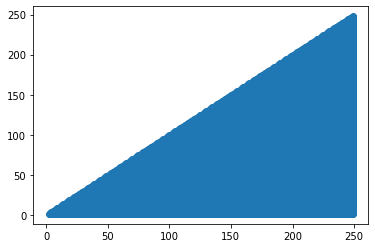

In [51]:
x, y = [], []
for i in range(1, 250):
    for z in range(1, 250):
        try:
            data = spectrogram(np.random.rand(2500), i, z)[-1][0]
            if len(data) % 4 == 0 and len(data)/len(data[0]) == 1:
                print(len(data), len(data[0]),i, z)
            x.append(i)
            y.append(z)
        except:
            pass
plt.scatter(x,y)
plt.show()

(1, 48, 48) (1, 48, 48)


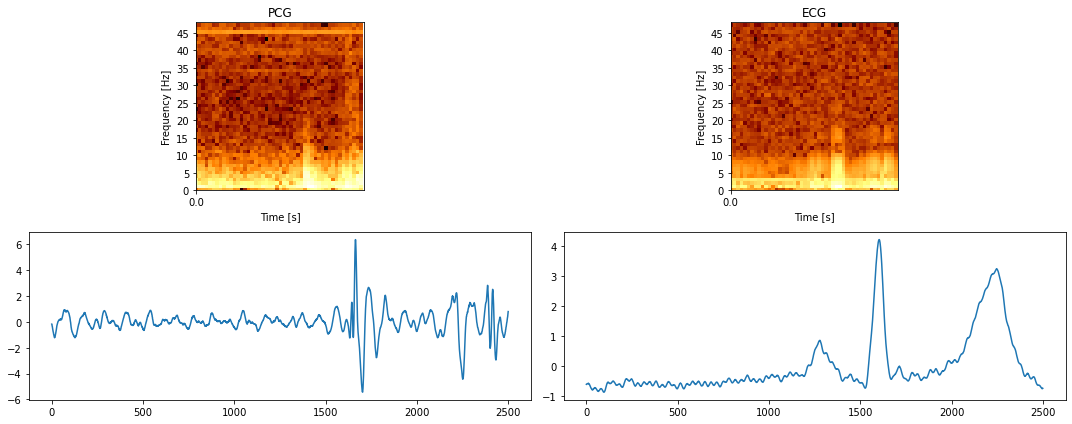

In [52]:
num = 50
pS = test(ECG[num][0], PCG[num][0], 94, 43)
